In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime

np.random.seed(1)
print(tf.__version__)

2.10.0


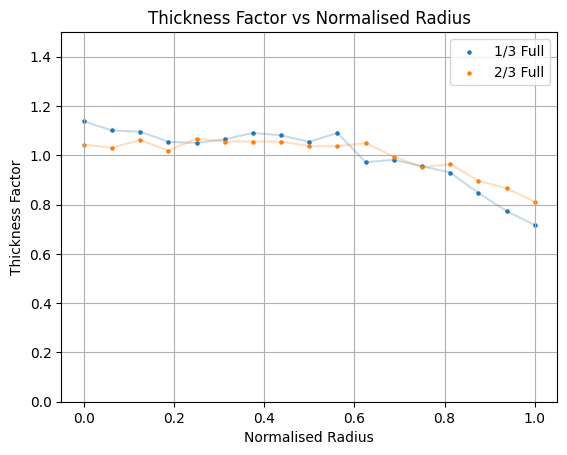

In [99]:
# Data
radii = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
thickness_factors1 = [1.138, 1.101, 1.096, 1.055, 1.05, 1.065, 1.091, 1.081, 1.055, 1.091, 0.972, 0.982, 0.956, 0.93, 0.847, 0.774, 0.717]
thickness_factors2 = [1.043, 1.031, 1.062, 1.019, 1.068, 1.056, 1.056, 1.056, 1.037, 1.037, 1.05, 0.995, 0.952, 0.964, 0.897, 0.866, 0.812]

max_radius = max(radii)
radii_norm = np.array(radii)/max_radius
thickness_factors1 = np.array(thickness_factors1)
thickness_factors2 = np.array(thickness_factors2)

plt.scatter(radii_norm, thickness_factors1, label='1/3 Full', s=5)
plt.scatter(radii_norm, thickness_factors2, label='2/3 Full', s=5)
plt.plot(radii_norm, thickness_factors1, alpha=0.25)
plt.plot(radii_norm, thickness_factors2, alpha=0.25)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend()
plt.grid()
plt.show()

#### 2D Fit
thickness factor = f (radius, fullness)

In [5]:
full1 = 0.333
full2 = 0.667

X_train = []
for i in range(len(radii_norm)):
    X_train += [[radii_norm[i], full1]]
for i in range(len(radii_norm)):
    X_train += [[radii_norm[i], full2]]
X_train = np.array(X_train)
print(f'X_train.shape = {X_train.shape}')

y_train = np.append(thickness_factors1, thickness_factors2)
print(f'y_train.shape = {y_train.shape}')


X_train.shape = (34, 2)
y_train.shape = (34,)


In [6]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='gelu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30000, verbose=0)

In [7]:
# Save the model
optional_desc = ''
dt = datetime.now().strftime('%y%m%d-%H%M')
if optional_desc == '':
    optional_desc = 'model'
model_path = f'ebeam/models/{optional_desc}-{dt}.h5'
model.save(model_path)

 1/50 [..............................] - ETA: 0s

50/50 [==============================] - 0s 878us/step


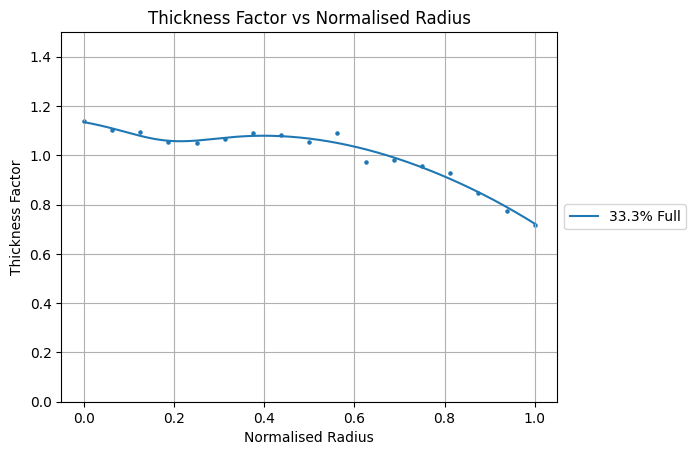

50/50 [==============================] - 0s 755us/step


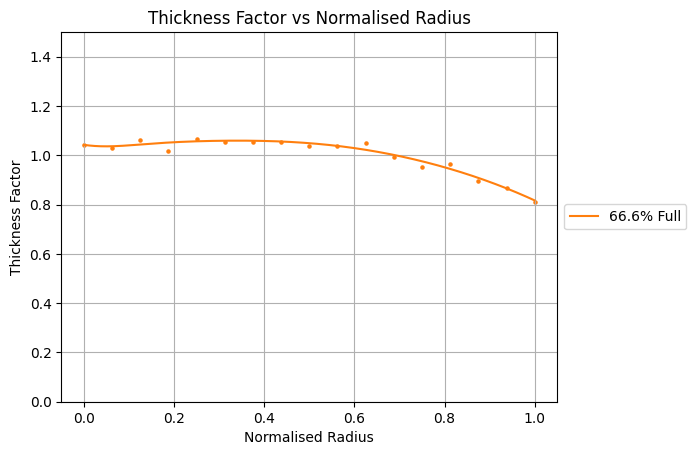

50/50 [==============================] - 0s 755us/step


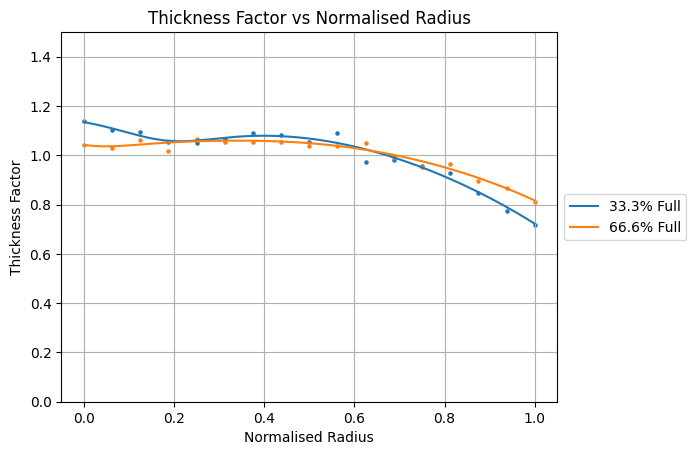

In [33]:
def plot_trained(full, color=None):

    radii_ls = np.arange(0, 160, 0.1)/max_radius
    full_ = np.ones(radii_ls.shape)*full

    X_test = np.column_stack((radii_ls, full_))
    y_test = model.predict(X_test)

    label = f'{full*100:.1f}% Full'
    plt.plot(X_test[:, 0], y_test, color=color, label=label)

# Plot the results
plot_trained(0.333)
plt.scatter(radii_norm, thickness_factors1, s=5)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plot the results
plot_trained(0.666, color='C1')
plt.scatter(radii_norm, thickness_factors2, s=5, color='C1')
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plot the results
plot_trained(0.333)
plot_trained(0.666)
plt.scatter(radii_norm, thickness_factors1, s=5)
plt.scatter(radii_norm, thickness_factors2, s=5)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

 1/50 [..............................] - ETA: 0s

50/50 [==============================] - 0s 694us/step


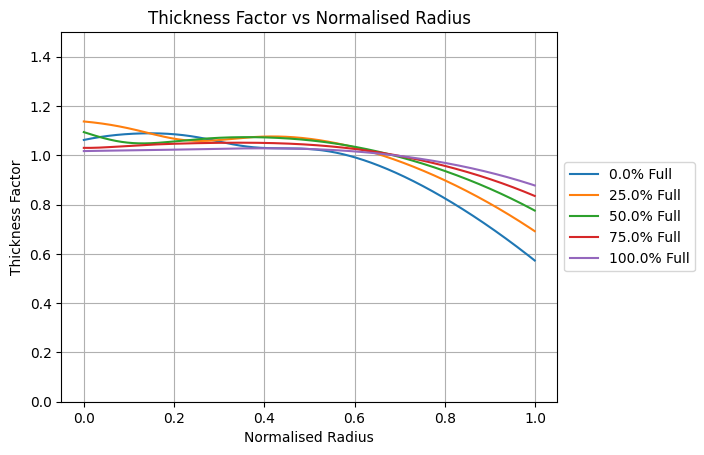

In [34]:
# Plot the results
for i in np.linspace(0, 1, 5):
    plot_trained(i)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

#### Plot thickness profile

In [31]:
# Constants
PLATE_X = 237.62
PLATE_Y = 237.62
CENTER_X = PLATE_X / 2
CENTER_Y = PLATE_Y / 2

In [35]:
# Load model if necessary
model_path = 'ebeam/models/model-230628-1604.h5'
model = tf.keras.models.load_model(model_path)

In [93]:
full = 0.666

4/4 [==============================] - 0s 1ms/step


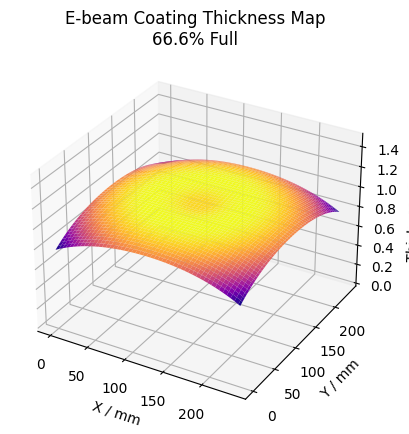

In [94]:
# Normalisation already done here
def get_tf(r, full):
    r_norm = r/max_radius
    full_ = np.ones(r_norm.shape)*full
    X_test = np.column_stack((r_norm, full_))
    y_test = model.predict(X_test)
    return y_test

# Plot profile in 3D
x_ = np.linspace(0, PLATE_X, 100)
y_ = np.linspace(0, PLATE_Y, 100)
xx_, yy_ = np.meshgrid(x_, y_)
zz_ = np.ones(xx_.shape)
for i in range(xx_.shape[0]):
    for j in range(xx_.shape[1]):
        zz_[i, j] = np.sqrt((xx_[i, j]-CENTER_X)**2 + (yy_[i, j]-CENTER_Y)**2)
for z_ in range(zz_.shape[0]):
    zz_[z_, :] = np.squeeze(get_tf(zz_[z_, :], full))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx_, yy_, zz_, cmap='plasma', edgecolor='none')
ax.set_xlabel('X / mm')
ax.set_ylabel('Y / mm')
ax.set_zlabel('Thickness Factor')
ax.set_zlim(0, 1.5)
ax.set_title(f'E-beam Coating Thickness Map\n{full*100:.1f}% Full')

plt.show()


In [95]:
# Get target numbers
n = np.arange(1, 181)
arg_n = np.where(((n-1) // 12) % 2 == 1, 0, 1)
front_n = n[arg_n == 1]
back_n = n[arg_n == 0]

# Read the data from the csv file
front_data = np.genfromtxt("front_data.csv", delimiter=",")
front_x = front_data[:, 0]
front_y = -front_data[:, 1] # Flip the y values cause drawing coordinate is upside down

back_data = np.genfromtxt("back_data.csv", delimiter=",")
back_x = back_data[:, 0]
back_y = -back_data[:, 1] # Flip the y values cause drawing coordinate is upside down

# Get distance of targets from center
front_radii = np.sqrt((front_x - CENTER_X) ** 2 + (front_y - CENTER_Y) ** 2)
back_radii = np.sqrt((back_x - CENTER_X) ** 2 + (back_y - CENTER_Y) ** 2)

merged_radii = []
for i in range(0, len(front_radii), 12):
    merged_radii.extend(front_radii[i:i+12])
    merged_radii.extend(back_radii[i:i+12])
merged_radii = np.array(merged_radii)

# Get thickness factors
front_tf = get_tf(front_radii, full)
back_tf = get_tf(back_radii, full)
target_tf = get_tf(merged_radii, full)

6/6 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Radius vs. Target Number (Unraveled)')

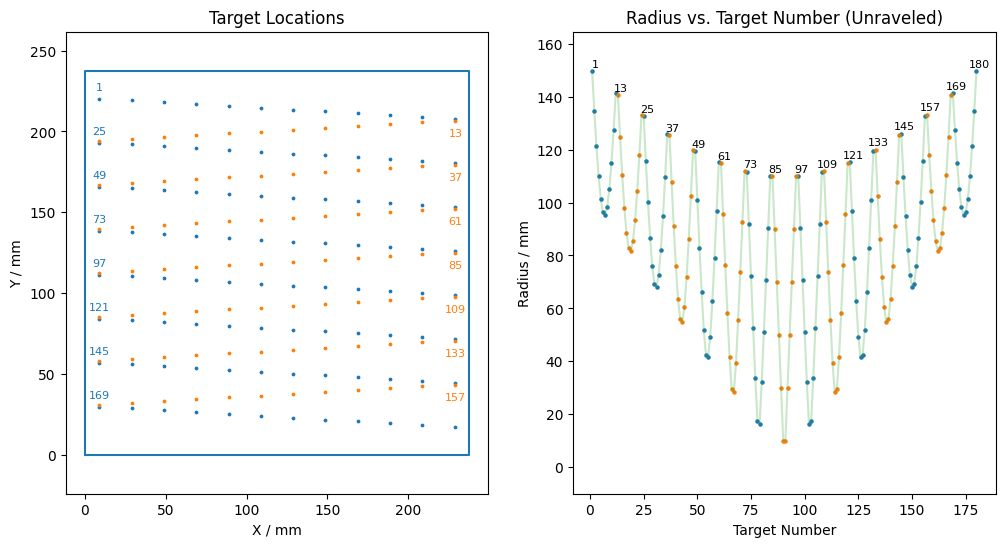

In [96]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Target Location Plot
for i, nn in enumerate(front_n):
    if (nn+11) % 12 == 0:
        ax1.annotate(nn, (front_x[i], -front_y[i]+2*CENTER_Y), fontsize=8, xytext=(front_x[i], -front_y[i]+2*CENTER_Y+5), c='C0', ha='center')
for i, nn in enumerate(back_n):
    if (nn+11) % 12 == 0:
        ax1.annotate(nn, (back_x[i], -back_y[i]+2*CENTER_Y), fontsize=8, xytext=(back_x[i]+PLATE_X-17.5, -back_y[i]+2*CENTER_Y-10), c='C1', ha='center')

square_x = [0, PLATE_X, PLATE_X, 0, 0]
square_y = [0, 0, PLATE_Y, PLATE_Y, 0]
ax1.plot(square_x, square_y)
ax1.scatter(-front_x+PLATE_X, front_y, s=3, c='C0', label='Front') # Flip the x values for plotting only
ax1.scatter(back_x, back_y, s=3, c='C1', label='Back')
ax1.set_xlabel('X / mm')
ax1.set_ylabel('Y / mm')
ax1.axis("equal")
ax1.set_title('Target Locations')


# Target Point Radius Plot
for i in range(0, len(n), 12):
    ax2.annotate(str(i+1), (n[i], merged_radii[i]), fontsize=8, xytext=(n[i]+1.5, merged_radii[i]+0.75), ha='center', va='bottom')
ax2.annotate(str(180), (n[-1], merged_radii[-1]), fontsize=8, xytext=(n[-1]+1.5, merged_radii[-1]+0.75), ha='center', va='bottom')

ax2.scatter(front_n, front_radii, s=5)
ax2.scatter(back_n, back_radii, s=5)
ax2.plot(n, merged_radii, c='C2', alpha=0.25)
ax2.set_xlabel('Target Number')
ax2.set_ylabel('Radius / mm')
ax2.set_ylim(-10, np.max(merged_radii) + 15)
ax2.set_title('Radius vs. Target Number (Unraveled)')

Number of targets within 0.85 and 1.15:   180/180
Mean: 1.023   Std: 0.041


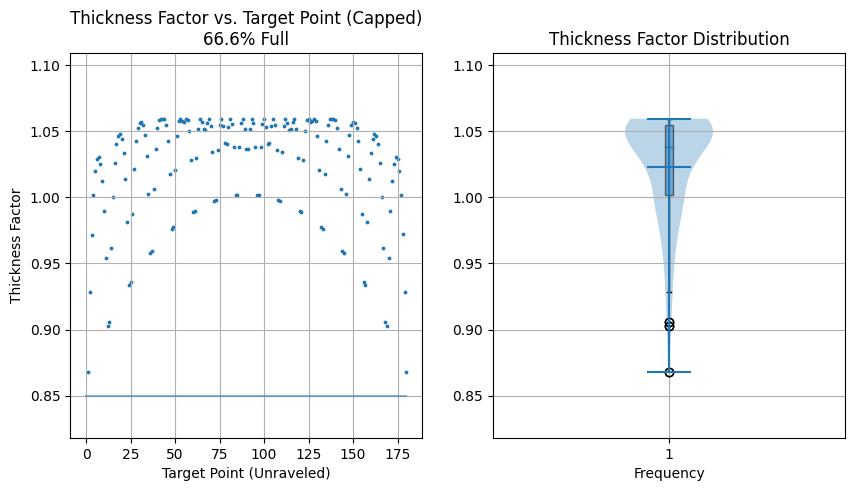

In [97]:
TF_FLOOR = 0.85
TF_CEILING = 1.15

arg_ok = np.where((target_tf >= TF_FLOOR) & (target_tf <= TF_CEILING))[0]
arg_notok = np.where((target_tf < TF_FLOOR) | (target_tf > TF_CEILING))[0]

n_ok = n[arg_ok]
target_tfok = target_tf[arg_ok]

n_notok = n[arg_notok]
target_tfnotok = target_tf[arg_notok]

print(f"Number of targets within {TF_FLOOR} and {TF_CEILING}:   {len(arg_ok)}/180")
print(f'Mean: {np.mean(target_tfok):.3f}   Std: {np.std(target_tfok):.3f}')

# Plot the ok points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot line to show the floor and ceiling
ax1.plot([0, 180], [TF_FLOOR, TF_FLOOR], c='C0', alpha=0.5)
ax1.plot([0, 180], [TF_CEILING, TF_CEILING], c='C0', alpha=0.5)
ax1.scatter(n_ok, target_tfok, s=3)
ax1.scatter(n_notok, target_tfnotok, s=3, c='C3')
ax1.set_xlabel('Target Point (Unraveled)')
ax1.set_ylabel('Thickness Factor')
ax1.set_ylim(np.min(target_tf)-0.05, np.max(target_tf)+0.05)
ax1.set_title(f'Thickness Factor vs. Target Point (Capped)\n{full*100:.1f}% Full')
ax1.grid()

box = ax2.boxplot(target_tfok, positions=[1], widths=0.05, patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('C0')
    patch.set_alpha(0.5)
for median in box['medians']:
    median.set_color('C0')
ax2.violinplot(target_tfok, showmeans=True)
ax2.set_xlim(0, 2)
ax2.set_ylim(np.min(target_tf)-0.05, np.max(target_tf)+0.05)
ax2.set_xlabel('Frequency')
ax2.set_title('Thickness Factor Distribution')
ax2.grid()
plt.show()

In [98]:
# Export data as df in csv
df = pd.DataFrame({'Target Number': n, 'Thickness Factor': np.squeeze(target_tf)})
df.to_csv('ebeam-66%.csv', index=False)

# Load csv head
with open('target_data_opt.csv', 'r') as f:
    df = pd.read_csv(f)
print(df.head().to_string(index=False, justify='center'))

 Target Number  Thickness Factor
      1             0.724238    
      2             0.905878    
      3             1.026816    
      4             1.089736    
      5             1.117702    
